In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn import linear_model

In [144]:
# Loading dataset
df=pd.read_csv("Unit04 Global_GDP.csv")

In [92]:
df.shape

(266, 65)

In [108]:
# Get first 5 entries in the dataset
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


In [94]:
# Get last 5 entries in the dataset (show data conversion will be required)
df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.582020e+11,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.048420e+11,3.879350e+11,3.354420e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10
265,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,1.758489e+10,1.811554e+10,1.928429e+10,1.805117e+10


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            128 non-null    float64
 5   1961            134 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            154 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            168 non-null    float64
 15  1971            171 non-null    float64
 16  1972            171 non-null    float64
 17  1973            171 non-null    flo

In [96]:
print(df.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
Length: 65, dtype: object


In [97]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

<Axes: >

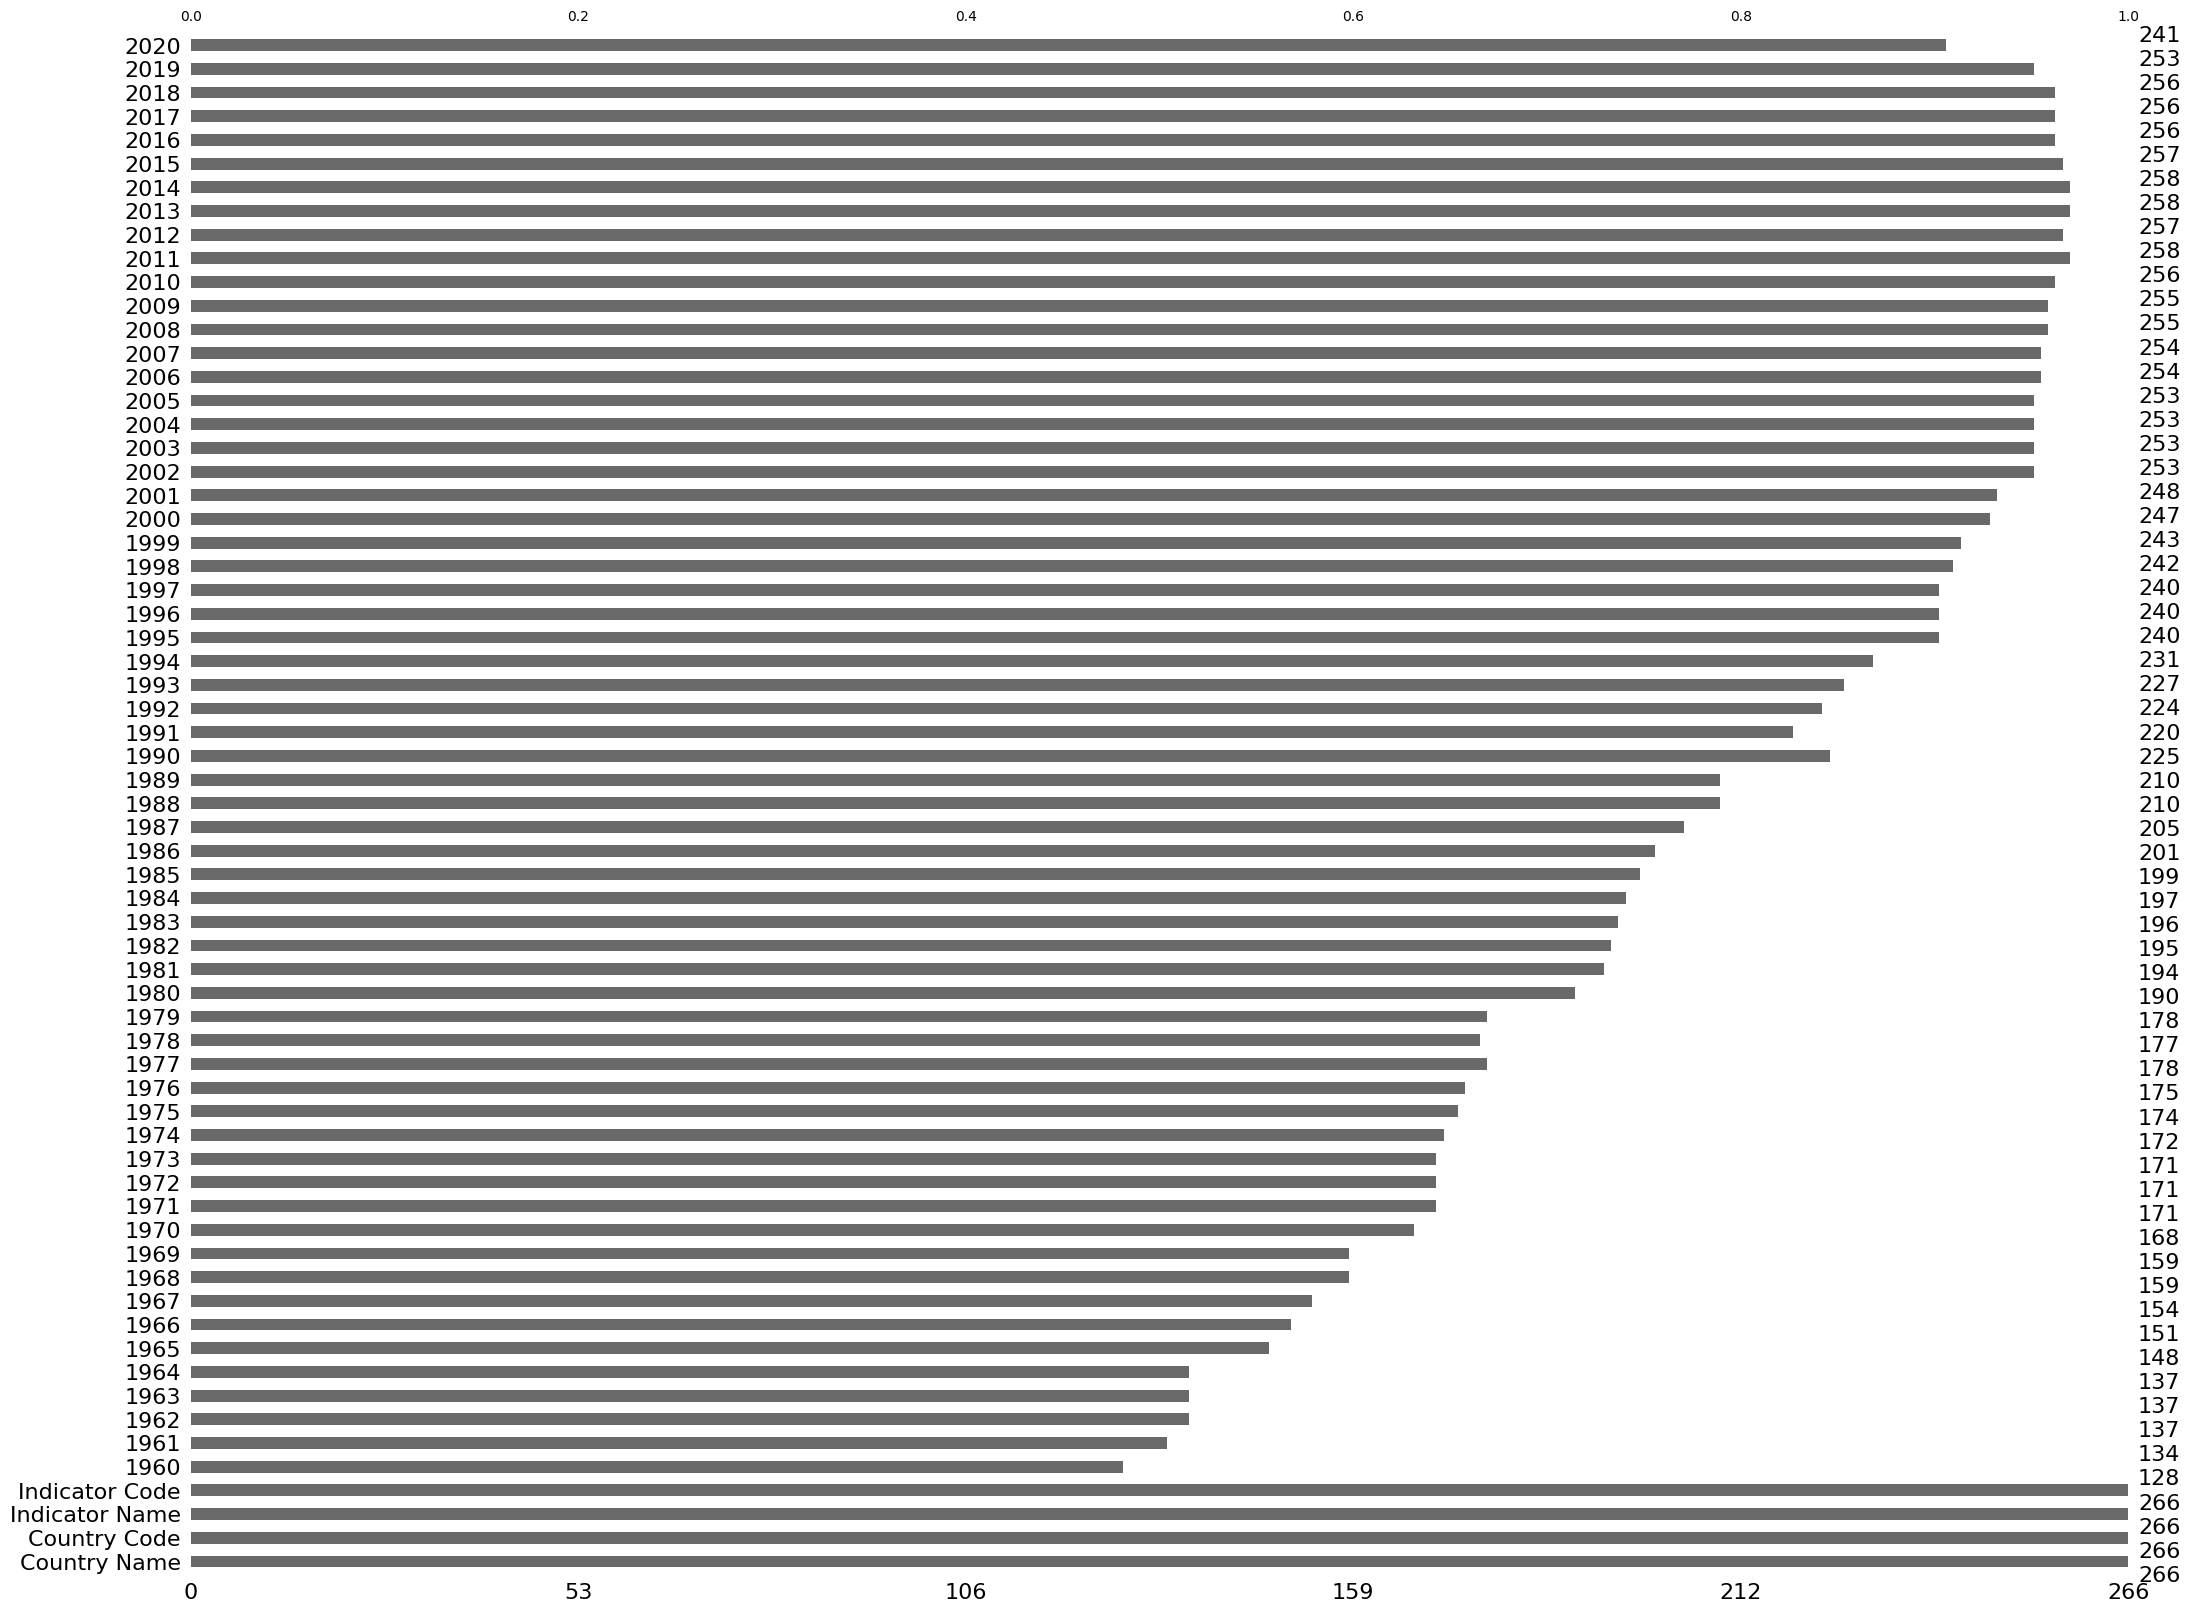

In [98]:
msno.bar(df)

In [99]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1.280000e+02,1.340000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.480000e+02,1.510000e+02,1.540000e+02,1.590000e+02,1.590000e+02,...,2.580000e+02,2.570000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.530000e+02,2.410000e+02
mean,7.212620e+10,7.253422e+10,7.563842e+10,8.157455e+10,8.961293e+10,9.099092e+10,1.012580e+11,1.050472e+11,1.101137e+11,1.217651e+11,...,2.759371e+12,2.407733e+12,2.482235e+12,2.552297e+12,2.407171e+12,2.447089e+12,2.620383e+12,2.786476e+12,2.864599e+12,2.902891e+12
std,2.176036e+11,2.218540e+11,2.356864e+11,2.535576e+11,2.773002e+11,2.912243e+11,3.188597e+11,3.372441e+11,3.591549e+11,3.953002e+11,...,8.812007e+12,8.167101e+12,8.387677e+12,8.614521e+12,8.170629e+12,8.321307e+12,8.851830e+12,9.424050e+12,9.619814e+12,9.541022e+12
min,1.201201e+07,1.159201e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.871181e+07,3.767177e+07,3.750908e+07,3.729061e+07,3.549207e+07,3.654780e+07,4.061925e+07,4.258816e+07,4.727146e+07,4.885555e+07
25%,4.930171e+08,5.007338e+08,5.317365e+08,5.161478e+08,5.828164e+08,5.981193e+08,6.526923e+08,6.381097e+08,6.713500e+08,7.234677e+08,...,8.106591e+09,8.709165e+09,8.747774e+09,9.297231e+09,8.738203e+09,8.666853e+09,9.565595e+09,1.046233e+10,1.131495e+10,1.218235e+10
50%,2.661047e+09,2.966849e+09,2.814319e+09,3.540403e+09,3.405333e+09,3.038595e+09,3.170500e+09,3.377453e+09,3.941700e+09,4.485778e+09,...,4.687279e+10,4.658046e+10,4.981676e+10,5.114388e+10,5.006595e+10,4.886913e+10,5.332271e+10,5.614404e+10,6.113687e+10,6.240971e+10
75%,2.209377e+10,2.947115e+10,2.886179e+10,3.341615e+10,3.106358e+10,2.717988e+10,2.892630e+10,3.037142e+10,3.339213e+10,3.744464e+10,...,5.702930e+11,5.524840e+11,5.447092e+11,5.456262e+11,5.051040e+11,5.261240e+11,5.666715e+11,5.634442e+11,5.972810e+11,7.522480e+11
max,1.387920e+12,1.444480e+12,1.546110e+12,1.666850e+12,1.825210e+12,1.988350e+12,2.157980e+12,2.296120e+12,2.478140e+12,2.733380e+12,...,8.149280e+13,7.535600e+13,7.742740e+13,7.953110e+13,7.510080e+13,7.629400e+13,8.118190e+13,8.625120e+13,8.755520e+13,8.467990e+13


In [100]:
df.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,138
...,...
2016,10
2017,10
2018,10
2019,13


In [145]:
df = df.dropna()

In [146]:
id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code']
df = pd.melt(frame=df, id_vars=id_vars, var_name='year', value_name='GDP')
df.describe()
df['year'] = df['year'].astype(int) # convert from object to int or float
df.info() # confirm data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    7259 non-null   object 
 1   Country Code    7259 non-null   object 
 2   Indicator Name  7259 non-null   object 
 3   Indicator Code  7259 non-null   object 
 4   year            7259 non-null   int64  
 5   GDP             7259 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 340.4+ KB


In [148]:
df.shape
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
0,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1960,1.929944e+10
1,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1960,1.040428e+10
2,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1960,1.860679e+10
3,Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,1960,6.592694e+09
4,Burundi,BDI,GDP (current US$),NY.GDP.MKTP.CD,1960,1.960000e+08


In [149]:
df.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
year,0
GDP,0


In [124]:
df = df.fillna(0)
df = df.transpose()
df.head(10)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,19299444453.0,19709535909.0,21478715486.0,25715008783.0,23510800233.0,26791601696.0,29131535493.0,30151828540.0,32853799013.0,...,942711000000.0,949849000000.0,963560000000.0,983749000000.0,918647000000.0,872023000000.0,984256000000.0,1011720000000.0,1008380000000.0,918815000000.0
3,Africa Western and Central,10404280784.0,11128050589.0,11943353288.0,12676515454.0,13838577015.0,14862472886.0,15832846881.0,14426432397.0,14880350847.0,...,670963000000.0,727571000000.0,820788000000.0,851487000000.0,760730000000.0,690543000000.0,683742000000.0,741692000000.0,794572000000.0,784588000000.0
13,Australia,18606786874.0,19683055213.0,19922723709.0,21539926084.0,23801097547.0,25977153097.0,27309889125.0,30444618658.0,32716989584.0,...,1397910000000.0,1546510000000.0,1576340000000.0,1467500000000.0,1350530000000.0,1206690000000.0,1326880000000.0,1428530000000.0,1391950000000.0,1327840000000.0
14,Austria,6592693841.0,7311749633.0,7756110210.0,8374175258.0,9169983886.0,9994070616.0,10887682273.0,11579431669.0,12440625313.0,...,431120000000.0,409425000000.0,430069000000.0,441996000000.0,381818000000.0,395569000000.0,416230000000.0,454946000000.0,445012000000.0,433258000000.0
16,Burundi,195999990.0,202999992.0,213500006.0,232749998.0,260750008.0,158994963.0,165444571.4,178297142.9,183200000.0,...,2235820868.0,2333308099.0,2451625333.0,2705783272.0,3104394858.0,2732808557.0,2748180474.0,2668495743.0,2631434363.0,2841786382.0
17,Belgium,11658722591.0,12400145222.0,13264015675.0,14260017387.0,15960106681.0,17371457608.0,18651883472.0,19992040788.0,21376353113.0,...,522646000000.0,496181000000.0,521643000000.0,534678000000.0,462150000000.0,475740000000.0,501523000000.0,543008000000.0,535289000000.0,521861000000.0
18,Benin,226195579.4,235668222.4,236434906.8,253927646.5,269818988.3,289908720.6,302925280.8,306222000.4,326323097.4,...,10693321954.0,11141358945.0,12517845732.0,13284528654.0,11388160958.0,11821066153.0,12701654743.0,14262407012.0,14391686633.0,15651545332.0
19,Burkina Faso,330442817.2,350247237.1,379567023.3,394040588.3,410321618.2,422916848.4,433889831.6,450753993.2,460442678.2,...,12080296644.0,12561016091.0,13444301139.0,13943016924.0,11832159276.0,12833363370.0,14106956830.0,15890065020.0,16178162030.0,17933606353.0
20,Bangladesh,4274893913.0,4817580184.0,5081413340.0,5319458351.0,5386054619.0,5906636557.0,6439687598.0,7253575399.0,7483685474.0,...,128638000000.0,133356000000.0,149990000000.0,172885000000.0,195079000000.0,221415000000.0,249711000000.0,274039000000.0,302571000000.0,323057000000.0
23,"Bahamas, The",169803921.6,190098039.2,212254902.0,237745098.0,266666666.7,300392156.9,340000000.0,390196078.4,444901960.8,...,10070450000.0,10720500000.0,10494600000.0,11142900000.0,11890600000.0,11992600000.0,12359700000.0,12837800000.0,13164400000.0,9907500000.0


In [150]:
df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df.rename(columns={'Country Name':'Country'}, inplace=True)
df.head(20)

,Country,year,GDP
0,Africa Eastern and Southern,1960,1.929944e+10
1,Africa Western and Central,1960,1.040428e+10
2,Australia,1960,1.860679e+10
3,Austria,1960,6.592694e+09
4,Burundi,1960,1.960000e+08
5,Belgium,1960,1.165872e+10
6,Benin,1960,2.261956e+08
7,Burkina Faso,1960,3.304428e+08
8,Bangladesh,1960,4.274894e+09
9,"Bahamas, The",1960,1.698039e+08


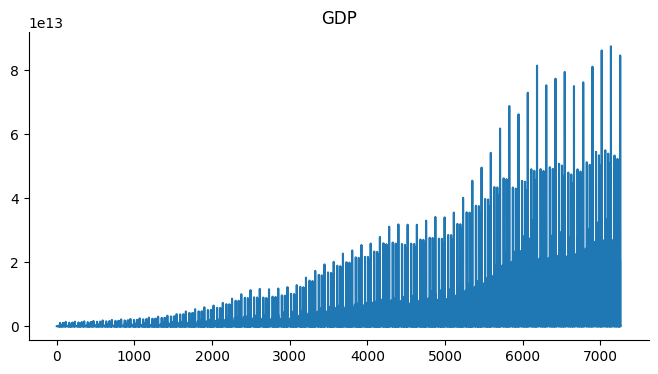

In [152]:
from matplotlib import pyplot as plt
df['GDP'].plot(kind='line', figsize=(8, 4), title='GDP')
plt.gca().spines[['top', 'right']].set_visible(False)

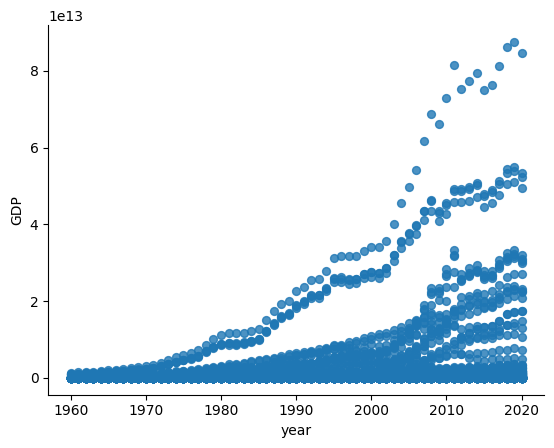

In [151]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='year', y='GDP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

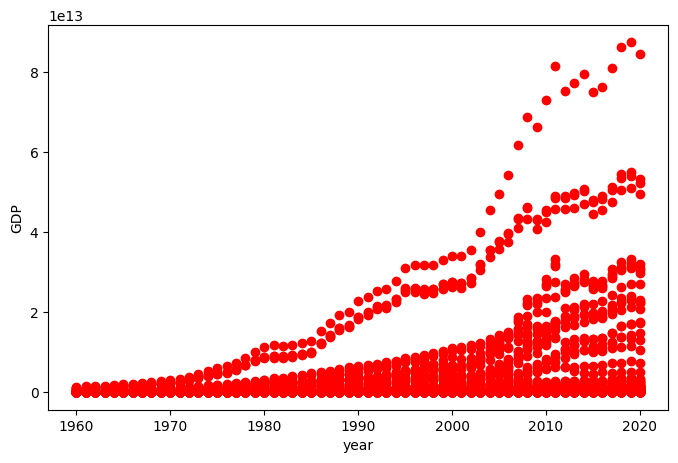

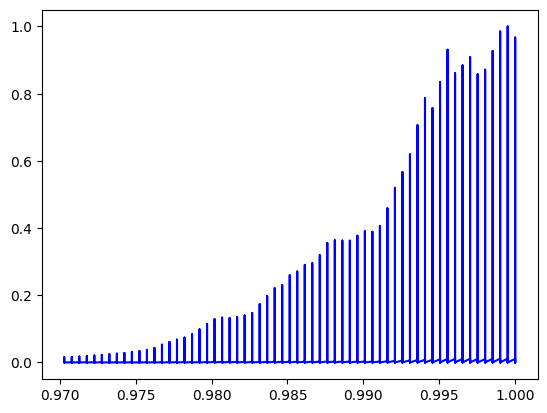

In [159]:
plt.figure(figsize=(8,5))
x_data,y_data=(df["year"].values,df["GDP"].values)
plt.plot(x_data,y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('year')
plt.show()
# Normalisation
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)

plt.plot(xdata,ydata,'b')

In [180]:
country = 'Belgium'
filter = df['Country'] != country
df_belgium = df.drop(df[filter].index, inplace=False) # filter by country
# df.shape
df_belgium.head(10), df_belgium.tail(10)

(      Country  year           GDP
 5     Belgium  1960  1.165872e+10
 124   Belgium  1961  1.240015e+10
 243   Belgium  1962  1.326402e+10
 362   Belgium  1963  1.426002e+10
 481   Belgium  1964  1.596011e+10
 600   Belgium  1965  1.737146e+10
 719   Belgium  1966  1.865188e+10
 838   Belgium  1967  1.999204e+10
 957   Belgium  1968  2.137635e+10
 1076  Belgium  1969  2.371074e+10,
       Country  year           GDP
 6074  Belgium  2011  5.226460e+11
 6193  Belgium  2012  4.961810e+11
 6312  Belgium  2013  5.216430e+11
 6431  Belgium  2014  5.346780e+11
 6550  Belgium  2015  4.621500e+11
 6669  Belgium  2016  4.757400e+11
 6788  Belgium  2017  5.015230e+11
 6907  Belgium  2018  5.430080e+11
 7026  Belgium  2019  5.352890e+11
 7145  Belgium  2020  5.218610e+11)

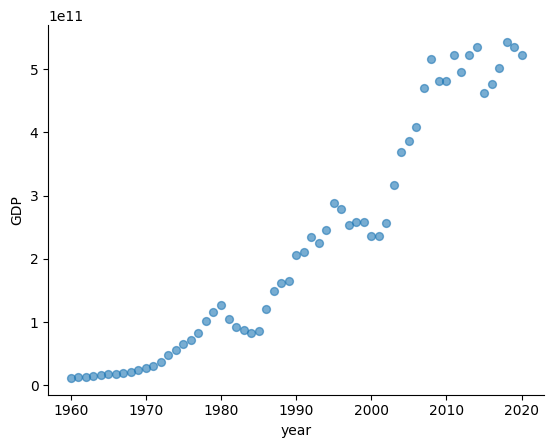

In [181]:
df_belgium.plot(kind='scatter', x='year', y='GDP', s=32, alpha=.6)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [160]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

print(X.shape)
print(y.shape)

X, y

(7259, 2)
(7259, 1)


(                             Country  year
 0        Africa Eastern and Southern  1960
 1         Africa Western and Central  1960
 2                          Australia  1960
 3                            Austria  1960
 4                            Burundi  1960
 ...                              ...   ...
 7254  St. Vincent and the Grenadines  2020
 7255                           World  2020
 7256                    South Africa  2020
 7257                          Zambia  2020
 7258                        Zimbabwe  2020
 
 [7259 rows x 2 columns],
                GDP
 0     1.929944e+10
 1     1.040428e+10
 2     1.860679e+10
 3     6.592694e+09
 4     1.960000e+08
 ...            ...
 7254  8.074741e+08
 7255  8.467990e+13
 7256  3.354420e+11
 7257  1.811063e+10
 7258  1.805117e+10
 
 [7259 rows x 1 columns])

In [162]:
df.describe()

,year,GDP
count,7259.00000,7.259000e+03
mean,1990.00000,1.754125e+12
std,17.60803,6.628651e+12
min,1960.00000,1.159201e+07
25%,1975.00000,3.476566e+09
50%,1990.00000,3.074447e+10
75%,2005.00000,3.480245e+11
max,2020.00000,8.755520e+13


In [166]:
X = df_belgium[['year']].values
y = df_belgium.GDP.values
regr = linear_model.LinearRegression()
model = regr.fit(X,y)

score = 0.93
coef = [9.98047304e+09]
intercept = -19636412273899.957


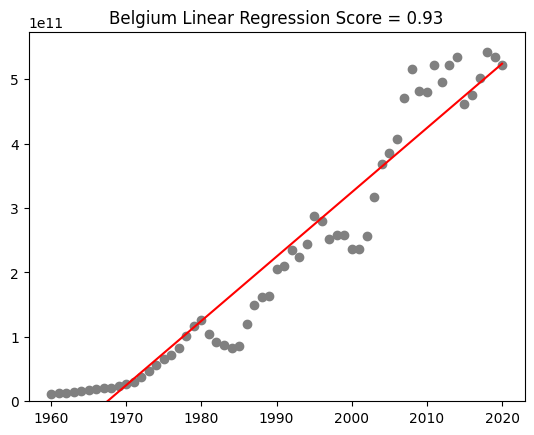

In [174]:
score = round(regr.score(X, y), 2)
title = f"Belgium Linear Regression Score = {score}"
plt.title(title)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef))
intercept = regr.intercept_
print('intercept = {}'.format(intercept))
y_pred = model.predict(X)

plt.scatter(X, y, color='gray')
plt.plot(X, y_pred, color='red')
plt.ylim(0)
plt.show()

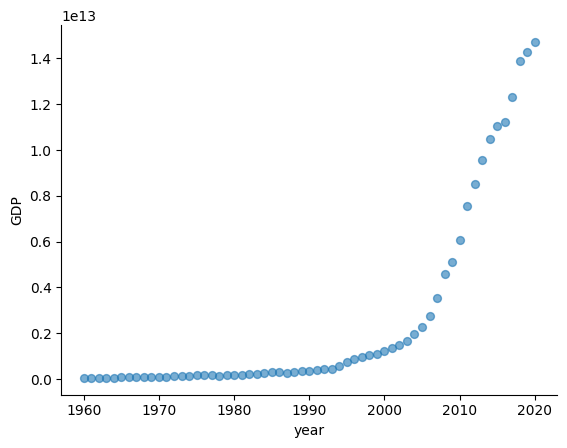

In [186]:
country = 'China'
filter = df['Country'] != country
df_china = df.drop(df[filter].index, inplace=False) # filter by country
# df_china.shape
#df_china.head(10), df_china.tail(10)

df_china.plot(kind='scatter', x='year', y='GDP', s=32, alpha=.6)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Linear regression GDP china

X = df_china[['year']].values
y = df_china.GDP.values
regr = linear_model.LinearRegression()
model = regr.fit(X,y)

score = 0.6
coef = [1.84322686e+11]
intercept = -364225468946972.56


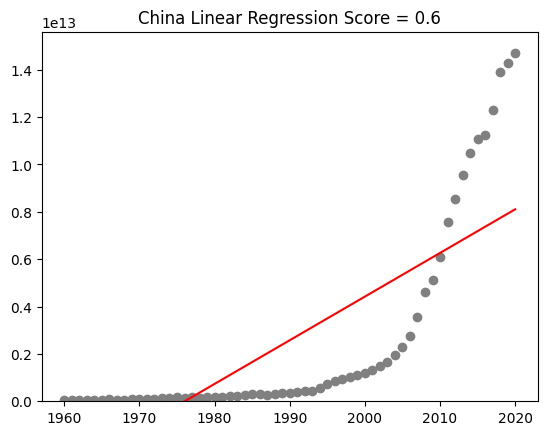

In [187]:
score = round(regr.score(X, y), 2)
title = f"China Linear Regression Score = {score}"
plt.title(title)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef))
intercept = regr.intercept_
print('intercept = {}'.format(intercept))
y_pred = model.predict(X)

plt.scatter(X, y, color='gray')
plt.plot(X, y_pred, color='red')
plt.ylim(0)
plt.show()